Notebook Penjelasan CRISP-DM

In [ ]:
1. BUSSINESS UNDERSTANDING

    Masuk ke dalam tahap pertama dari model CRISP-DM, Bagaimana Membangun dan Mendapatkan data Dan menentukan Tujuan. 
--Bussiness Problem :
  Kesehatan adalah hal paling penting, tetapi seringkali kita tidak bisa mengontrol makanan yang masuk ke dalam tubuh kita.
  McDonalds merupakan restoran fast food terbesar di dunia, terutama di India. Jenis Makanan yang berkalori tinggi seperti daging ayam, sapi kentang dan masih banyak lagi. 
  Jenis Makanan berkalori tinggi ini ada dalam menu yg diolah restoran McDonalds. 
  Makanan berkalori tinggi adalah makanan yang di dalamnya terkandung berbagai macam nutrisi, seperti karbohidrat, protein, gula, hingga lemak. 
  Tetapi terlalu banyak mengomsumsi makanan berkalori tinggi akan berbahaya untuk tubuh. Bisa terkena diabetes, lemak berlebih/obesitas, serta kolestrol

--Himpunan Data :
  Data ini diperoleh dari kaggle.com "https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts"

--Tujuan :
  Analisis ini untuk mengetahui Berapa estimasi jumlah kalori yang ada dalam makanan di menu McDonalds India, agar lebih menjaga kesehatan dan berguna untuk yang akan melakukan program diet. 

In [ ]:
2. Data Understanding
Pada Analisis ini menggunakan model Regresi Linear maka tipe data yang cocok yaitu numerik (int,float)
Berikut Himpunan Data yang sudah dipilih(Dataset) beserta tipe data :

 0   Menu_Category               (Kategori Menu)object 
 1   Menu_Items                  (Item Menu)object 
 2   Energy                      (Kalori)float64 ✓
 3   Protein                     (Proetin)float64 ✓
 4   Total_fat                   (Jumlah Lemak)float64 ✓
 5   Cholesterols                (Kolestrol)float64 ✓
 6   Total_carbohydrate          (Jumlah Karbohidrat)float64 ✓
 7   Total_Sugars                (Jumlah Gula)float64 ✓

Terdapat tipe data float (6) dan object (2)

In [ ]:
3. Data Preparation

Tahap ini memastikan data yang tepat berdasarkan model algoritma yang digunakan yaitu Regresi Linear
Data yang tepat untuk digunakan : Energy , Protein, Total_fat, Cholesterols , Total_carbohydrate, Total_Sugars.

(x)feature : Protein, Total_fat, Cholesterols,Total_carbohydrate, Total_Sugars.
(y)label :Energy

In [ ]:
5. Evaluation
Pada tahap ini akan dilakukan evaluasi terhadap keefektifan dan kualitas model sebelum digunakan 
dan menentukan apakah model dapat mencapat tujuan yang ditetapkan pada fase awal (Business Understanding).

In [ ]:
6. Deployment
Pada tahap ini, pengetahuan atau informasi yang telah diperoleh dari analisis akan diatur 
dan dipresentasikan dalam bentuk aplikasi streamlit sehingga dapat digunakan oleh pengguna. 

# deskripsi library yang digunakan

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [61]:
df = pd.read_csv('India_menu.csv')

# Deskripsi Dataset

In [62]:
df.head()

,Menu_Category,Menu_Items,Energy,Protein,Total_fat,Cholesterols,Total_carbohydrate,Total_Sugars
0,Regular Menu,McVeggieâ„¢ Burger,402.05,10.24,13.83,2.49,56.54,7.90
1,Regular Menu,McAloo Tikki BurgerÂ®,339.52,8.50,11.31,1.47,50.27,7.05
2,Regular Menu,McSpicyâ„¢ Paneer Burger,652.76,20.29,39.45,21.85,52.33,8.35
3,Regular Menu,Spicy Paneer Wrap,674.68,20.96,39.10,40.93,59.27,3.50
4,Regular Menu,American Veg Burger,512.17,15.30,23.45,25.24,56.96,7.85


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Menu_Category       141 non-null    object 
 1   Menu_Items          141 non-null    object 
 2   Energy              141 non-null    float64
 3   Protein             141 non-null    float64
 4   Total_fat           141 non-null    float64
 5   Cholesterols        141 non-null    float64
 6   Total_carbohydrate  141 non-null    float64
 7   Total_Sugars        141 non-null    float64
dtypes: float64(6), object(2)
memory usage: 8.9+ KB


<Axes: >

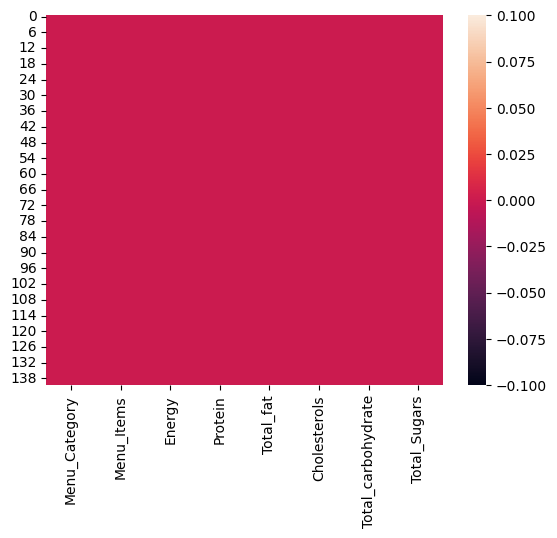

In [64]:
sns.heatmap(df.isnull())

In [65]:
df.describe()

,Energy,Protein,Total_fat,Cholesterols,Total_carbohydrate,Total_Sugars
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,244.635461,7.493546,9.991702,26.350071,31.190284,15.464894
std,185.554837,8.336863,10.339511,50.334200,20.602044,15.690202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,1.510000,15.740000,2.330000
50%,219.360000,4.790000,7.770000,8.390000,30.820000,9.160000
75%,339.520000,10.880000,14.160000,31.110000,46.000000,26.950000
max,834.360000,39.470000,45.180000,302.610000,93.840000,64.220000


# Visualisasi Data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_7080\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

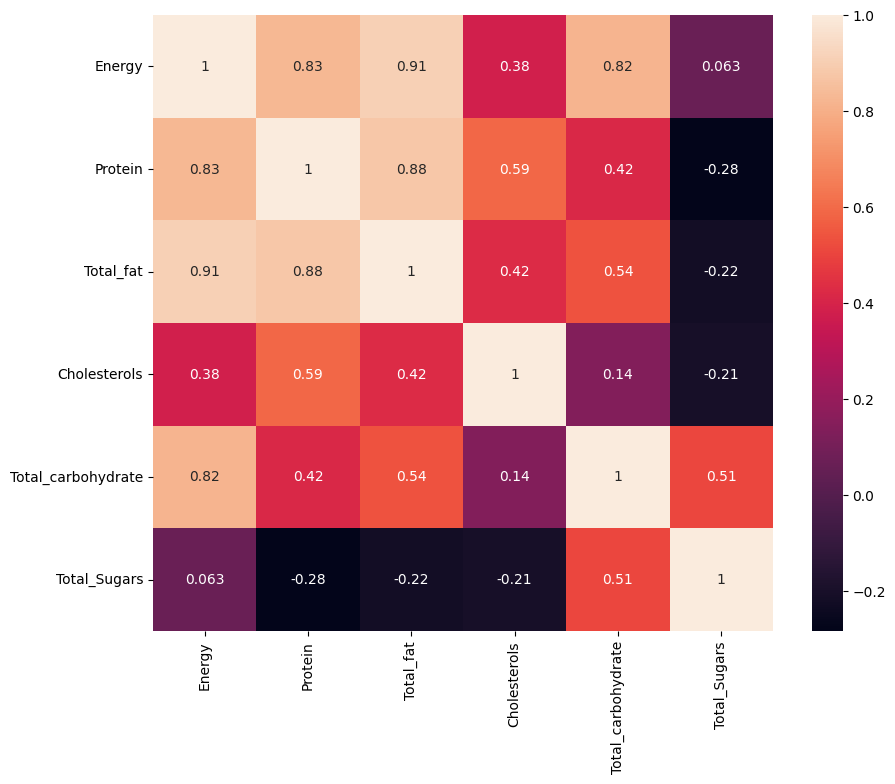

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Kalori berdasarkan Item Menu

In [67]:
item = df.groupby('Menu_Items').count()[['Protein']].sort_values(by='Protein',ascending=True).reset_index()
item = item.rename(columns={'Protein':'KaloryOfItem'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]),
 [Text(0, 0, '2 piece Chicken Strips'),
  Text(1, 0, 'Moroccon Mint Green Tea (S)'),
  Text(2, 0, 'Moroccon Mint Green Tea (R)'),
  Text(3, 0, 'Moroccon Mint Green Tea (L)'),
  Text(4, 0, 'Mocha Frappe'),


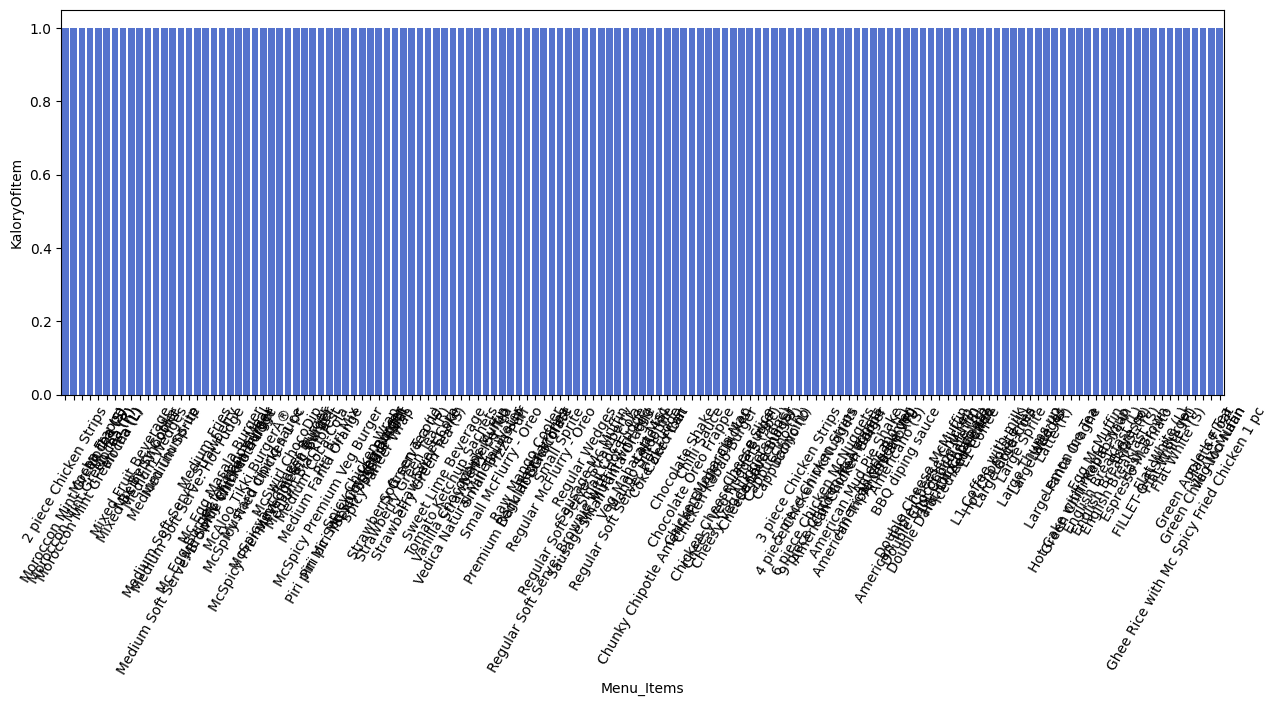

In [68]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=item['Menu_Items'], y=item['KaloryOfItem'], color='royalblue')
plt.xticks(rotation=60)

# distribusi Jumlah Kalori

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_7080\2690377772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Energy'])


<Axes: xlabel='Energy', ylabel='Density'>

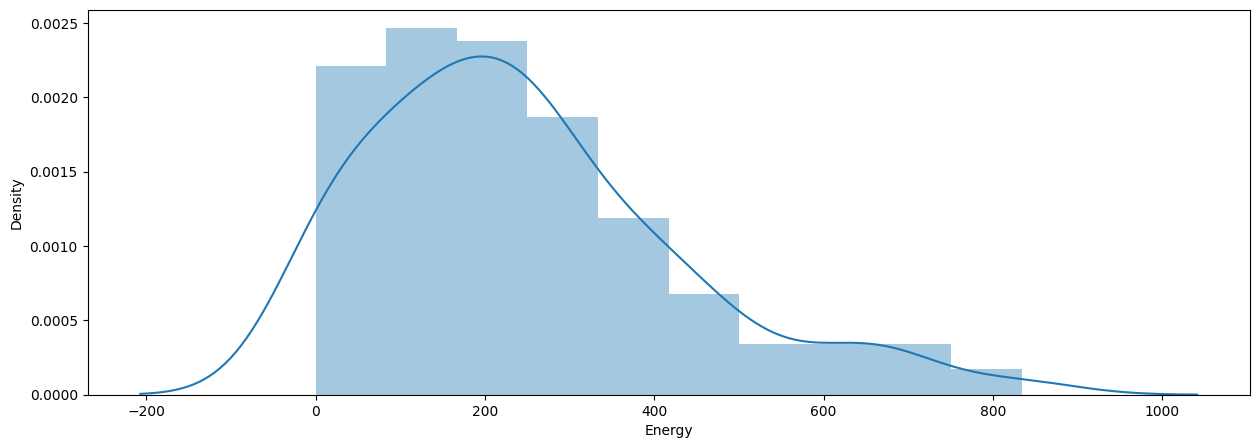

In [69]:
plt.figure(figsize=(15,5))
sns.distplot(df['Energy'])

# seleksi fitur

In [70]:
features = ['Protein', 'Total_fat', 'Cholesterols','Total_carbohydrate', 'Total_Sugars']
x = df[features]
y = df['Energy']
x.shape, y.shape

((141, 5), (141,))

# split data training dan data testing

In [71]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(36,)

# membuat model regresi linier

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [73]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9967785137133418


# membuat inputan model regresi linier

In [76]:
#Protein : 10.24 ,Total_fat : 13.83 ,Cholesterols : 2.49 , Total_carbohydrate : 56.54 , Total_Sugars : 7.9
input_data = np.array([[10.24,13.83,2.49,56.54,7.9]])

prediction = lr.predict(input_data)
print('Estimasi jumlah kalori makanan di Menu McDonalds :', prediction, 'kCal')

Estimasi jumlah kalori makanan di Menu McDonalds : [414.57220161] kCal


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [77]:
import pickle

filename = 'estimasi_kalori.sav'
pickle.dump(lr,open(filename,'wb'))